In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df_ptbd_normal = pd.read_csv("/content/drive/My Drive/Task_1/ptbdb_normal.csv", header = None)
df_ptbd_abnormal = pd.read_csv("/content/drive/My Drive/Task_1/ptbdb_abnormal.csv", header = None)

# classes are 0 (normal) and 1 (abnormal)
classes_names = {0 : "normal",
                 1 : "abnormal"}

num_cols = df_ptbd_normal.shape[1] - 1

# the signal was resampled at frequency of 125Hz as the input
# compute the time vector
time = np.arange(0, num_cols) / 125
# convert to milliseconds
time = time * 1000

# concatenate the two dataframes
df_ptbd = pd.concat([df_ptbd_normal, df_ptbd_abnormal],axis=0,ignore_index=True)

# The last column contains the labels
# label 0 = normal
# label 1 = abnormal
df_ptbd =df_ptbd.rename(columns={187: 'label'})

In [4]:
X = df_ptbd.iloc[:, :187].values # Getting all columns except the last (b/c of label)
y = df_ptbd.iloc[:, 187].values
print("PREVIOUS SHAPE: \n", "X SHAPE: ", X.shape)
print("PREVIOUS SHAPE: \n", "Y SHAPE: ", y.shape)

X = X.reshape(-1, 187) # Reshapes X to (# of rows, 187)
y = y.reshape(-1, 1) # Reshapes y to (# of rows, 1)

X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

print("\n\nCURRENT SHAPE: \n", "X SHAPE: ", X_tensor.shape)
print("\nCURRENT SHAPE: \n", "y SHAPE: ", y_tensor.shape)

PREVIOUS SHAPE: 
 X SHAPE:  (14552, 187)
PREVIOUS SHAPE: 
 Y SHAPE:  (14552,)


CURRENT SHAPE: 
 X SHAPE:  torch.Size([14552, 187])

CURRENT SHAPE: 
 y SHAPE:  torch.Size([14552, 1])


In [29]:
# Split into training and test sets (80 - 20)
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

X_tt, X_val, y_tt, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Normalize data
scaler = StandardScaler()
X_tt = scaler.fit_transform(X_tt)
X_val = scaler.fit_transform(X_val)
X_test = scaler.transform(X_test)


# Convert to PyTorch tensors
X_tt_tensor = torch.tensor(X_tt, dtype=torch.float32)
y_tt_tensor = torch.tensor(y_tt, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Define Neural Network
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()

        # Define layers
        self.fc1 = nn.Linear(187, 64)
        self.relu = nn.ReLU()

        self.fc2 = nn.Linear(64, 32)
        self.relu = nn.ReLU()

        # Softmax Layer
        self.fc3 = nn.Linear(32, 1)
        self.softmax = nn.Sigmoid()

    # Define forward pass (how inputs move through already defined Network)
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)

        out = self.fc2(out)
        out = self.relu(out)

        out = self.fc3(out)
        out = self.softmax(out)

        return out


model = NeuralNet()
criterion = nn.BCELoss() # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.0005) # Adam Optimizer

<ipython-input-29-719041717c40>:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_tt_tensor = torch.tensor(y_tt, dtype=torch.float32)
<ipython-input-29-719041717c40>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_val_tensor = torch.tensor(y_val, dtype=torch.float32)
<ipython-input-29-719041717c40>:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test_tensor = torch.tensor(y_test, dtype=torch.float32)


In [30]:
# Getting Epoc and Batch Sizes Defined
num_epochs = 100
batch_size = 16

Epoch 0/100 -- Loss: 0.2157
Epoch 5/100 -- Loss: 0.0519
Epoch 10/100 -- Loss: 0.0305
Epoch 15/100 -- Loss: 0.0260
Epoch 20/100 -- Loss: 0.0404
Epoch 25/100 -- Loss: 0.0368
Epoch 30/100 -- Loss: 0.1003
Epoch 35/100 -- Loss: 0.0174
Epoch 40/100 -- Loss: 0.0707
Epoch 45/100 -- Loss: 0.0007
Epoch 50/100 -- Loss: 0.0013
Epoch 55/100 -- Loss: 0.0025
Epoch 60/100 -- Loss: 0.0001
Epoch 65/100 -- Loss: 0.0001
Epoch 70/100 -- Loss: 0.1925
Epoch 75/100 -- Loss: 0.0002
Epoch 80/100 -- Loss: 0.0295
Epoch 85/100 -- Loss: 0.0074
Epoch 90/100 -- Loss: 0.0011
Epoch 95/100 -- Loss: 0.0001
Epoch 100/100 -- Loss: 0.0001


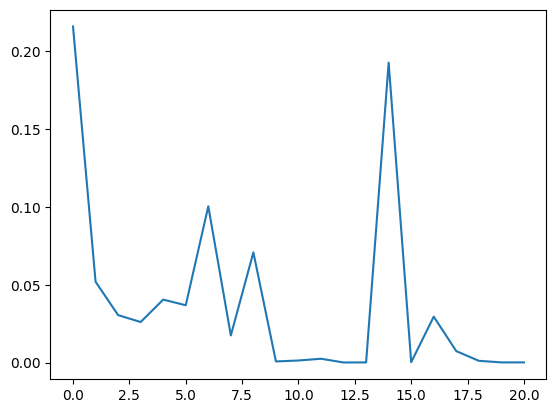

In [31]:
loss_list = []
for epoch in range(num_epochs + 1):
   # Mini Batch Training
    for i in range(0, len(X_tt), batch_size):
      # Create Splices of Data
        batch_X = X_tt_tensor[i:i+batch_size]
        batch_y = y_tt_tensor[i:i+batch_size]

        # Forward Pass
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)

        # Backward Pass (Backpropagation)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if(epoch % 5 == 0):
        loss_list.append(loss.item())
        print(f"Epoch {epoch}/{num_epochs} -- Loss: {loss.item():.4f}")

# Plot Loss
x = range(len(loss_list))
y = loss_list
plt.plot(x, y)
plt.show()

In [32]:
# Evaluate the model on validation set
with torch.no_grad():
    outputs = model(X_val_tensor)
    predicted_labels = torch.round(outputs)
    accuracy = (predicted_labels == y_val_tensor).sum().item() / y_val_tensor.size(0)
    print("Test Accuracy:", accuracy)

Test Accuracy: 0.9647917561185058


In [33]:
# Evaluate the model on test set
with torch.no_grad():
    outputs = model(X_test_tensor)
    predicted_labels = torch.round(outputs)
    accuracy = (predicted_labels == y_test_tensor).sum().item() / y_test_tensor.size(0)
    print("Test Accuracy:", accuracy)

Test Accuracy: 0.9704568876674682
